In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.datasets import load_breast_cancer

cancer_data = pd.read_csv('cancerdata.csv')


C:\Users\shrav\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,...,25.380,17.33,184.60,2019.0,0.16220,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,...,24.990,23.41,158.80,1956.0,0.12380,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,...,23.570,25.53,152.50,1709.0,0.14440,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,...,14.910,26.50,98.87,567.7,0.20980,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,...,22.540,16.67,152.20,1575.0,0.13740,0.075833,0.4000,0.126386,0.2364,0.087483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,9.477218,17.173224,142.00,1479.0,0.110550,0.037279,0.160806,0.047462,...,25.450,26.40,166.10,2027.0,0.14100,0.238996,0.4107,0.163526,0.2060,0.073780
565,926682,M,11.657306,25.502865,131.20,1261.0,0.113881,0.108912,0.134949,0.039279,...,23.690,38.25,155.00,1731.0,0.11660,0.219149,0.3215,0.032357,0.2572,0.068449
566,926954,M,20.102883,14.544119,108.30,858.1,0.100213,0.003465,0.072762,0.042914,...,18.980,34.12,126.70,1124.0,0.11390,0.279461,0.3403,0.113976,0.2218,0.098450
567,927241,M,16.206551,19.616466,140.10,1265.0,0.112486,0.158756,0.096860,0.024182,...,25.740,39.42,184.60,1821.0,0.16500,0.116461,0.9387,0.067784,0.4087,0.074609


As we can see above, not much can be done in the current form of the dataset. We need to view the data in a better format.

# Let's Explore Our Dataset

In [3]:
cancer_data.shape

(569, 32)

In [4]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_wors',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

Above is the name of each columns in our dataframe.

# The next step is to Visualize our data

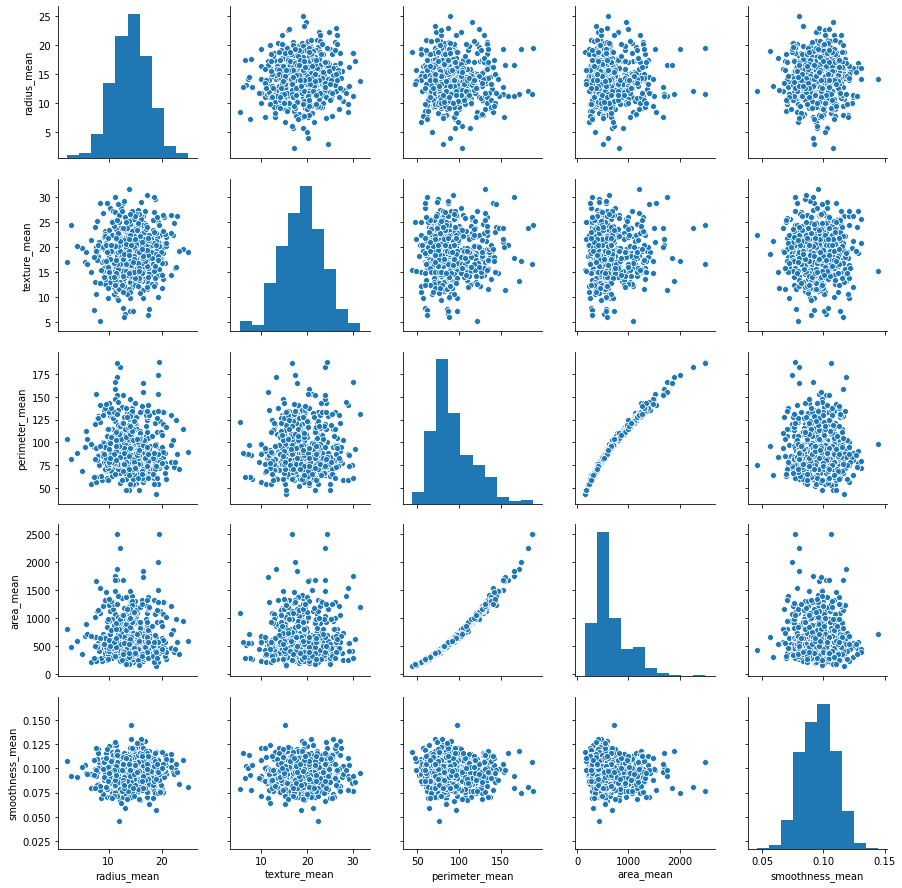

In [5]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(cancer_data, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'] )

The above plots shows the relationship between our features. But the only problem with them is that they do not show us which of the "dots" is Malignant and which is Benign. 

This issue will be addressed below by using "target" variable as the "hue" for the plots.

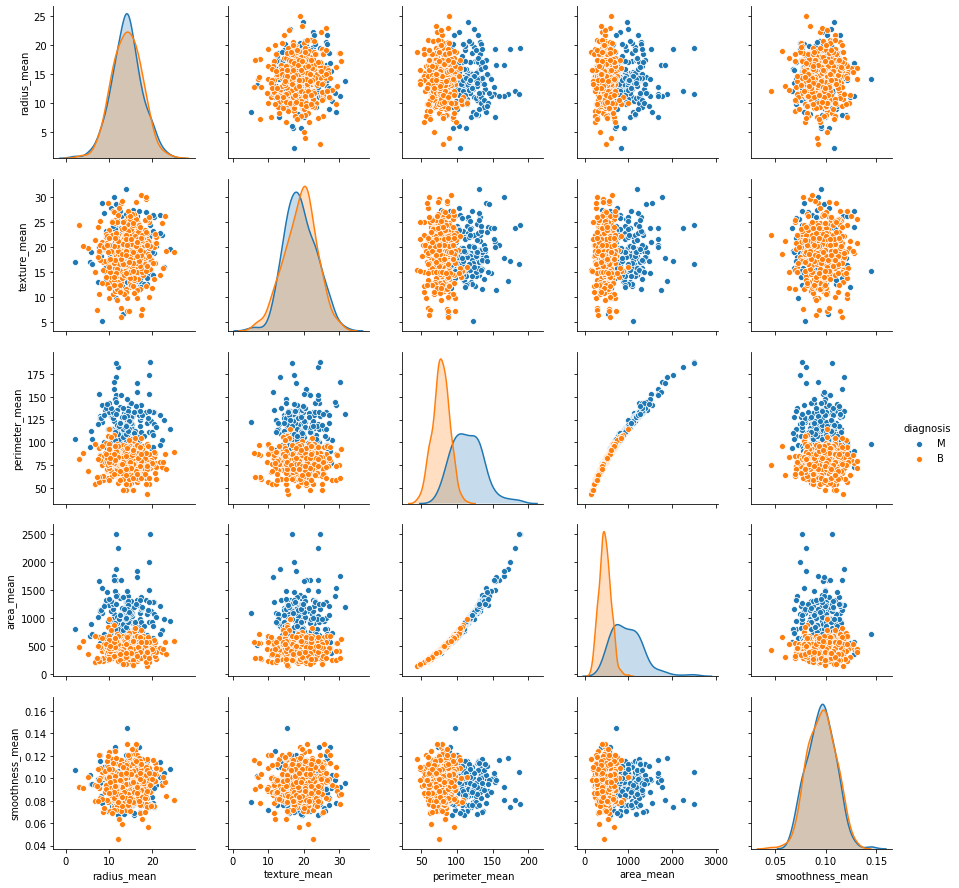

In [6]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(cancer_data, hue = 'diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'] )

In [7]:
cancer_data['diagnosis'].map({'B':1,'M':0})



0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

**Note:** 
    
  1.0 = Benign (No Cancer)
  
  0.0 = Malignant (Cancer)

# How many Benign and Malignant do we have in our dataset?

In [8]:
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

As we can see, we have 212 - Malignant, and 357 - Benign

 Let's visulaize our counts

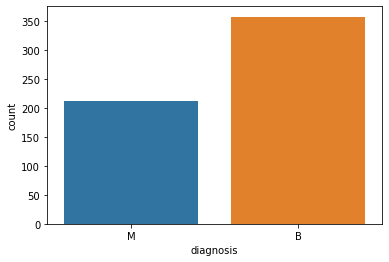

In [9]:
sns.countplot(cancer_data['diagnosis'], label = "Count") 

# Let's check the correlation between the variables 

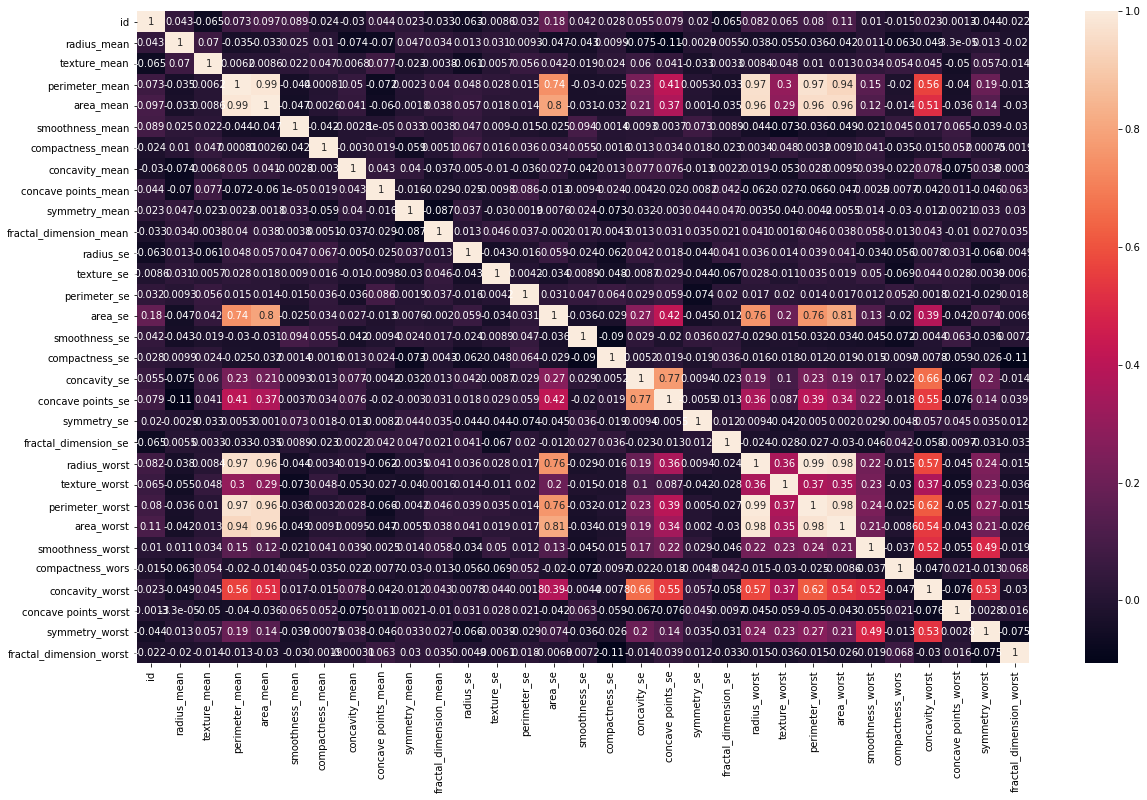

In [10]:
plt.figure(figsize=(20,12)) 
sns.heatmap(cancer_data.corr(), annot=True) 

In [11]:
X = cancer_data.drop(['id'], axis = 1) 
X.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,M,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,M,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,M,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,M,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [12]:
X = cancer_data.drop(['diagnosis'], axis = 1) # We drop our "target" feature and use all the remaining features in our dataframe to train the model.
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_wors,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,14.204716,20.202641,122.80,1001.0,0.096113,0.089479,0.184766,0.096526,0.150053,...,25.38,17.33,184.60,2019.0,0.1622,0.134597,0.7119,0.120681,0.4601,0.101594
1,842517,18.483496,22.464181,132.90,1326.0,0.094443,0.063299,0.086927,0.021108,0.213798,...,24.99,23.41,158.80,1956.0,0.1238,0.529227,0.2416,0.035439,0.2750,0.079397
2,84300903,15.516300,18.271486,130.00,1203.0,0.075842,0.059376,0.132738,0.052357,0.222581,...,23.57,25.53,152.50,1709.0,0.1444,0.166906,0.4504,0.149670,0.3613,0.088802
3,84348301,15.540583,27.560108,77.58,386.1,0.091525,0.088022,0.194466,0.010895,0.179685,...,14.91,26.50,98.87,567.7,0.2098,0.224998,0.6869,0.110799,0.6638,0.086210
4,84358402,14.005198,11.678064,135.10,1297.0,0.092790,0.010642,0.030518,0.037828,0.147534,...,22.54,16.67,152.20,1575.0,0.1374,0.075833,0.4000,0.126386,0.2364,0.087483


In [13]:
y = cancer_data['diagnosis']
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [14]:
from sklearn.model_selection import train_test_split

Let's split our data using 80% for training and the remaining 20% for testing.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

Let now check the size our training and testing data.

In [16]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', y_test.shape)

The size of our training "X" (input features) is (455, 31)


The size of our testing "X" (input features) is (114, 31)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


In [17]:
from sklearn.svm import SVC

In [18]:
svc_model = SVC()

In [19]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
y_predict = svc_model.predict(X_test)

In [21]:
# Import metric libraries

from sklearn.metrics import classification_report, confusion_matrix

In [22]:
cm = np.array(confusion_matrix(y_test, y_predict))
cm

array([[66,  0],
       [48,  0]], dtype=int64)

In [23]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.58      1.00      0.73        66
           M       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



C:\Users\shrav\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [25]:
sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)

In [26]:
type(X_train)

pandas.core.frame.DataFrame

In [27]:
#scaler = MinMaxScaler()
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
#X_train=scaler.fit_transform(X_train)

In [30]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

In [34]:
cm

array([[66,  0],
       [ 5, 43]], dtype=int64)

In [ ]:
#Use gri search to still improve the accuracy